In [ ]:
!pip install spacy


In [ ]:
!pip install newsapi-python

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
!pip install wordcloud


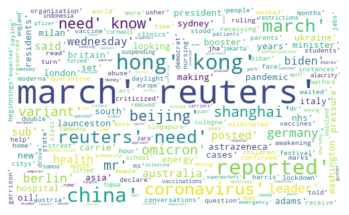

In [29]:
import spacy
from newsapi import NewsApiClient
import pickle
import en_core_web_lg
import pandas as pd
from collections import Counter
from string import punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt


nlp = spacy.load('en_core_web_lg')

#pd.read_excel("C:\Users\ritik\PluralSightML\covidArticle.xlsx")
csv_file = 'covidArticles.csv'
#data = pd.read_csv(csv_file)
    
df = pd.read_csv(csv_file, usecols = ['title','description', 'content'])
#df 

results = []

def get_keywords_eng(text):
    result = []
    pos_tag = ['PROPN', 'VERB', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        if (token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue

        if (token.pos_ in pos_tag):
            result.append(token.text)
    #print(result)
    return result

for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results
#print(results)

text = str(results)

#print(text)
wordcloud = WordCloud(max_font_size=50, width=500, height=300, max_words=200, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()